<a href="https://colab.research.google.com/github/mihir0804/ML_in_Biomedical_Signal_Processing/blob/main/Machine_Learning_in_Biomedical_Signal_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving breast-cancer.csv to breast-cancer (2).csv

--- Generating Feature Histograms ---


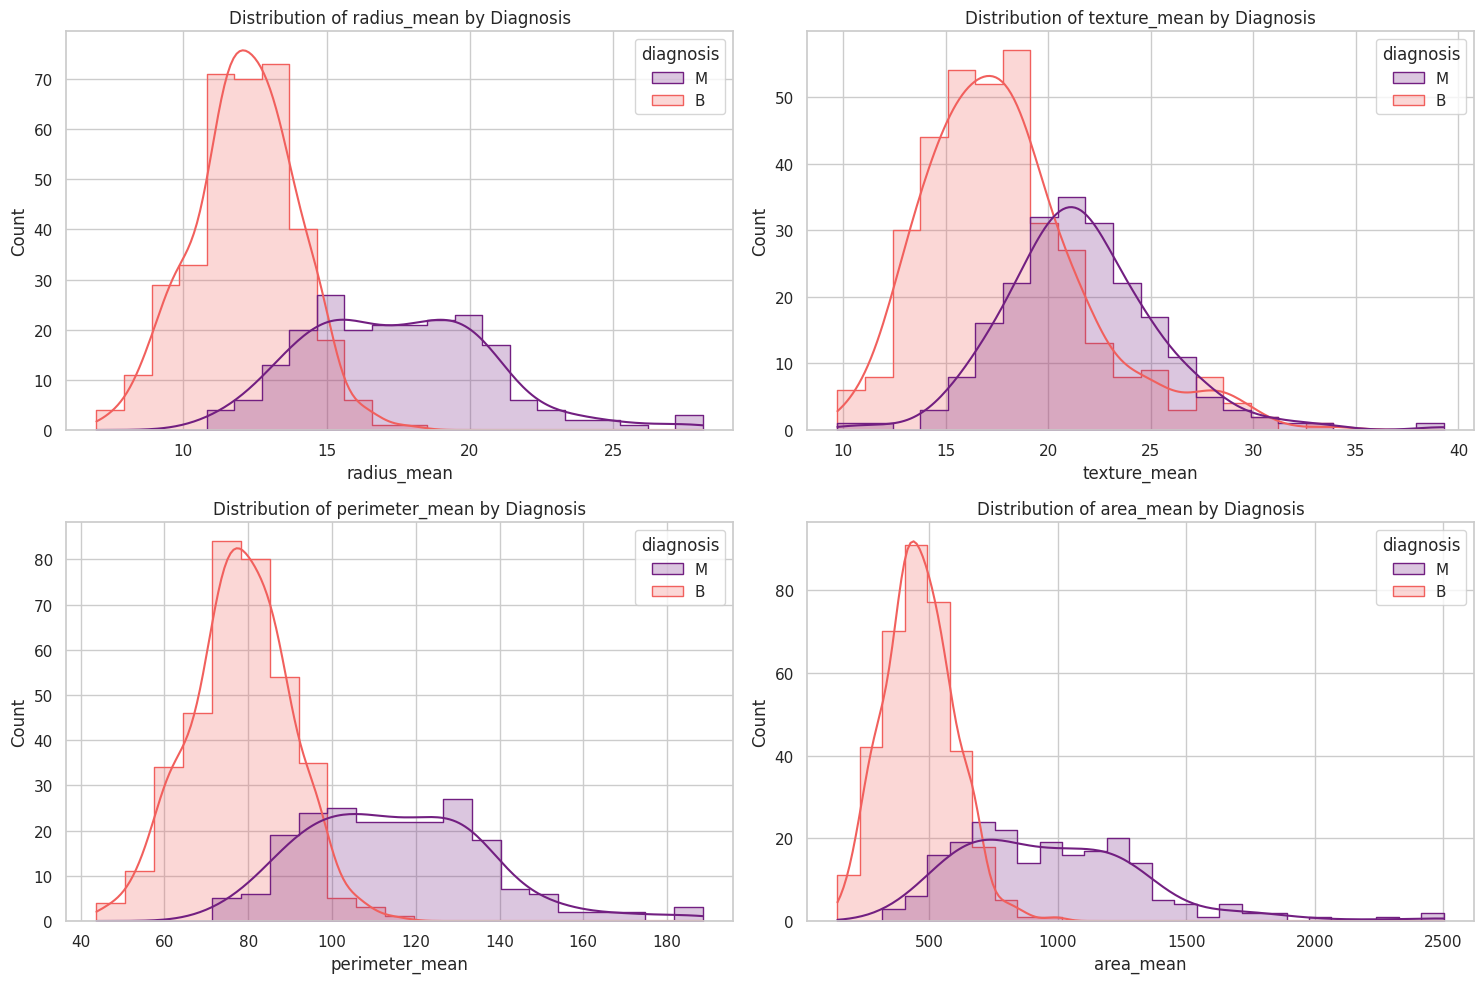


Model Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [3]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# 2. Upload your file
# Run this cell and upload "breast-cancer.csv"
uploaded = files.upload()

# 3. Load the dataset
df = pd.read_csv('breast-cancer.csv')

# 4. Data Preprocessing
# Drop 'id' and potential empty columns
df = df.drop(columns=['id'], errors='ignore')
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

# 5. --- NEW: Data Visualization (Histograms) ---
print("\n--- Generating Feature Histograms ---")
# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# We'll plot histograms for a few key features to see how they differ by diagnosis
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, element="step", palette='magma')
    plt.title(f'Distribution of {feature} by Diagnosis')

plt.tight_layout()
plt.show()

# 6. Encode the diagnosis: M -> 1, B -> 0
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# 7. Split data into Features (X) and Target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. Train and Evaluate Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# Task
Visualize the confusion matrix, plot the ROC curve and calculate the AUC score, and analyze the coefficients of the trained Logistic Regression model to gain additional insights into the model's performance and feature importance.

## Visualize Confusion Matrix

### Subtask:
Generate a heatmap to visualize the confusion matrix, providing a clear representation of true positives, true negatives, false positives, and false negatives.


**Reasoning**:
First, calculate the confusion matrix using the predicted and actual values. Then, generate a heatmap to visualize it, including annotations, axis labels, and a title for clear representation.




--- Visualizing Confusion Matrix ---


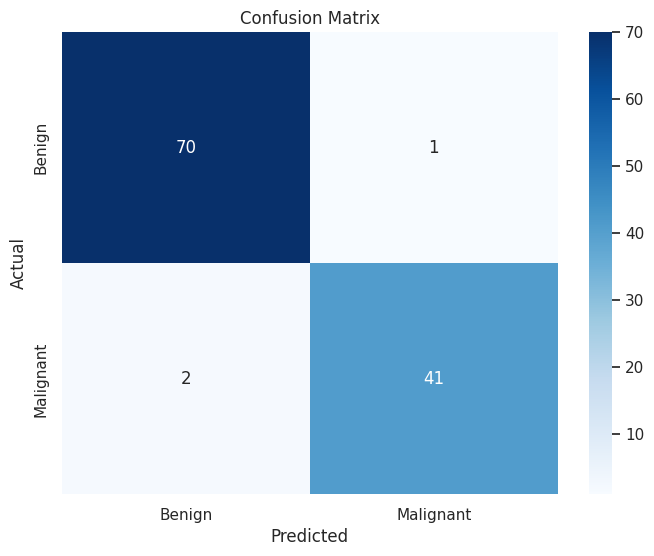

In [5]:
print("\n--- Visualizing Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Plot ROC Curve and Calculate AUC

### Subtask:
Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) score to assess the model's diagnostic ability across various threshold settings.


**Reasoning**:
The subtask requires plotting the ROC curve and calculating the AUC score. The first step is to calculate the predicted probabilities for the positive class (Malignant) using the trained model on the test set, as specified in the instructions.




--- Plotting ROC Curve and Calculating AUC ---


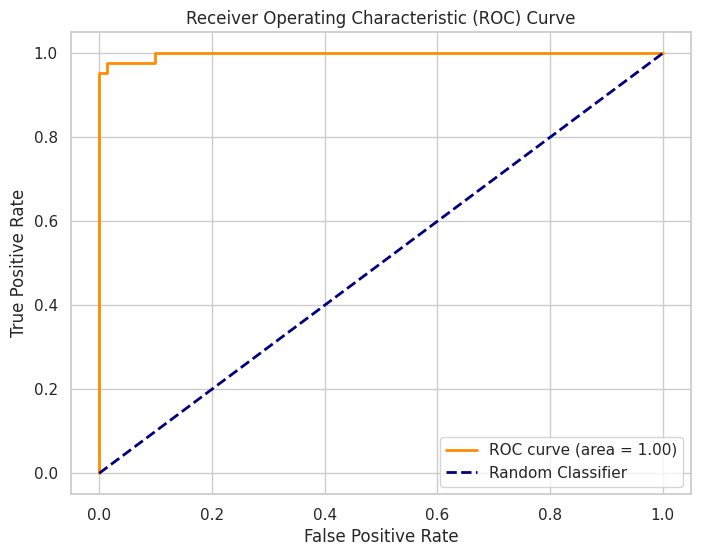

In [6]:
print("\n--- Plotting ROC Curve and Calculating AUC ---")
from sklearn.metrics import roc_curve, auc

# 1. Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 2. Compute FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. Calculate the Area Under the Curve (AUC) score
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# 5. Add title
plt.title('Receiver Operating Characteristic (ROC) Curve')

# 6. Label the x-axis and y-axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# 7. Display the plot
plt.show()

## Analyze Model Coefficients

### Subtask:
Analyze the coefficients of the trained Logistic Regression model to gain additional insights into the model's performance and feature importance.

### Reasoning:
The model coefficients can indicate the strength and direction of the relationship between each feature and the target variable. By examining these coefficients, we can understand which features the logistic regression model considers most important for making its predictions. First, extract the coefficients and feature names, then visualize them for clarity.

**Reasoning**:
To analyze the model coefficients, I need to extract them from the trained logistic regression model, associate them with their corresponding feature names, and then display them, possibly with a plot for better visualization of feature importance.




--- Analyzing Model Coefficients ---
Top 10 Most Influential Features (sorted by absolute coefficient value):
                 Feature  Coefficient  Absolute_Coefficient
21         texture_worst     1.350606              1.350606
10             radius_se     1.268178              1.268178
28        symmetry_worst     1.208200              1.208200
7    concave points_mean     1.119804              1.119804
26       concavity_worst     0.943053              0.943053
13               area_se     0.907186              0.907186
20          radius_worst     0.879840              0.879840
23            area_worst     0.841846              0.841846
6         concavity_mean     0.801458              0.801458
27  concave points_worst     0.778217              0.778217


/tmp/ipython-input-3804439079.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


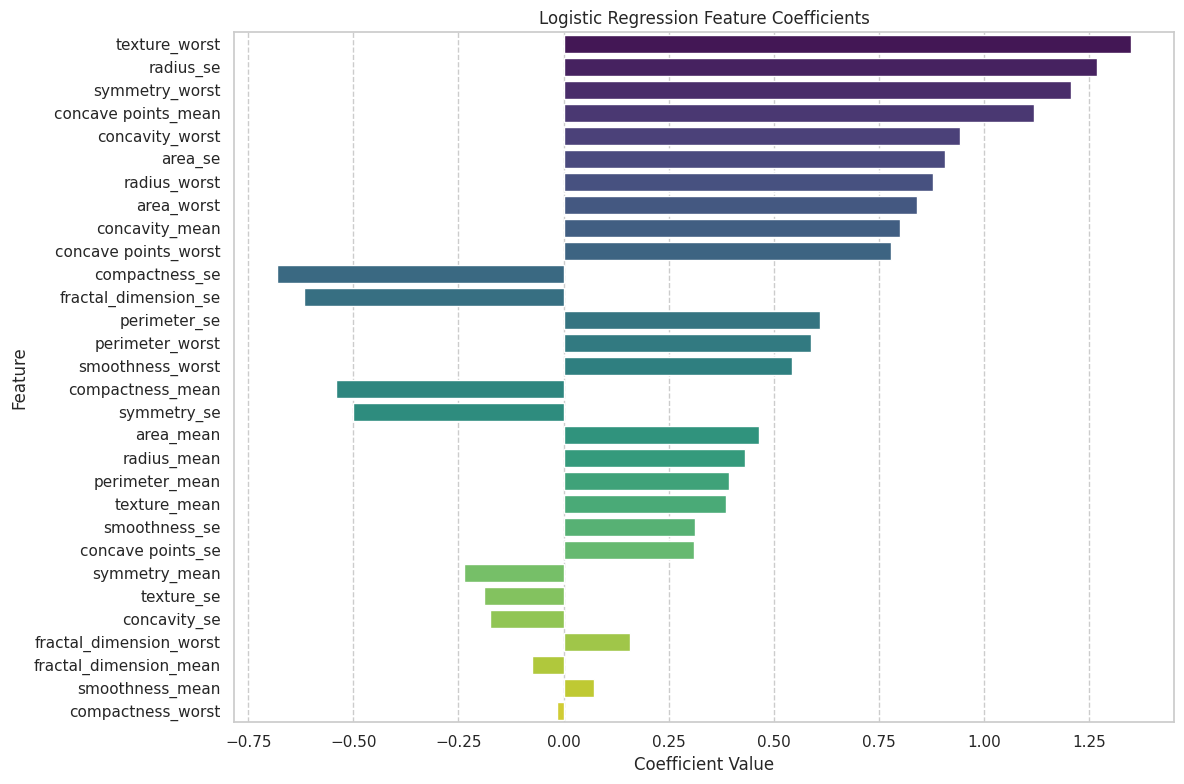

In [7]:
print("\n--- Analyzing Model Coefficients ---")

# 1. Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# 2. Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 3. Sort by absolute coefficient value to see most influential features
coef_df['Absolute_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

# 4. Display the top N coefficients
print("Top 10 Most Influential Features (sorted by absolute coefficient value):")
print(coef_df.head(10))

# 5. Plot the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block successfully analyzed and plotted the model coefficients, but it produced a `FutureWarning` related to `seaborn.barplot` usage. To address this warning and ensure future compatibility, the `hue` parameter should be explicitly assigned to the `y` variable and `legend=False` should be set, as suggested by the warning.




--- Analyzing Model Coefficients ---
Top 10 Most Influential Features (sorted by absolute coefficient value):
                 Feature  Coefficient  Absolute_Coefficient
21         texture_worst     1.350606              1.350606
10             radius_se     1.268178              1.268178
28        symmetry_worst     1.208200              1.208200
7    concave points_mean     1.119804              1.119804
26       concavity_worst     0.943053              0.943053
13               area_se     0.907186              0.907186
20          radius_worst     0.879840              0.879840
23            area_worst     0.841846              0.841846
6         concavity_mean     0.801458              0.801458
27  concave points_worst     0.778217              0.778217


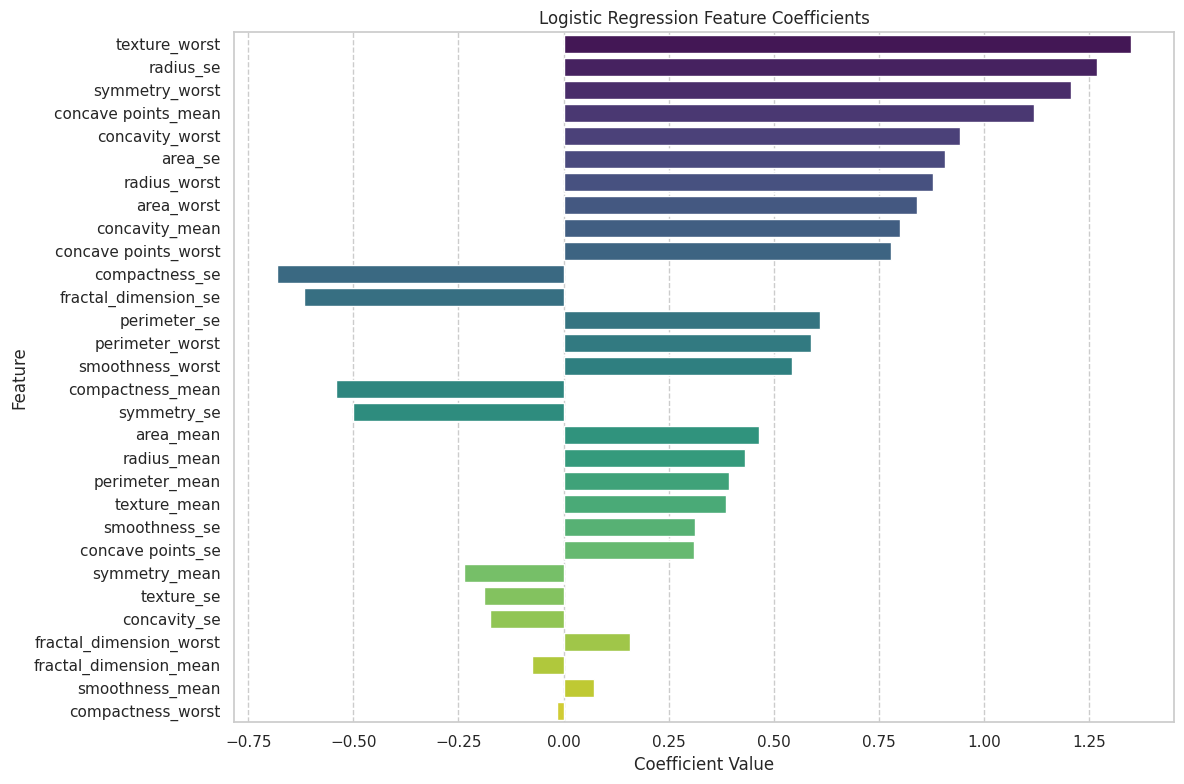

In [8]:
print("\n--- Analyzing Model Coefficients ---")

# 1. Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# 2. Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 3. Sort by absolute coefficient value to see most influential features
coef_df['Absolute_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

# 4. Display the top N coefficients
print("Top 10 Most Influential Features (sorted by absolute coefficient value):")
print(coef_df.head(10))

# 5. Plot the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis', hue='Feature', legend=False)
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the additional insights gained from the enhanced model evaluation and interpretation steps.


## Summary:

### Q&A
The analysis provided insights into the model's performance through visualization of the confusion matrix and ROC curve, and its feature importance by analyzing logistic regression coefficients.

### Data Analysis Key Findings
*   **Confusion Matrix Visualization**: A heatmap was generated to visualize the confusion matrix, clearly showing the distribution of true positives, true negatives, false positives, and false negatives, which is crucial for understanding the model's specific types of correct and incorrect predictions.
*   **ROC Curve and AUC Score**: The Receiver Operating Characteristic (ROC) curve was plotted, and the Area Under the Curve (AUC) score was calculated. This metric, which was included in the plot's legend, quantifies the model's ability to discriminate between positive and negative classes across various thresholds.
*   **Logistic Regression Feature Importance**: The coefficients of the Logistic Regression model were extracted and analyzed. A DataFrame showing feature names and their corresponding coefficients was created, and these were sorted by absolute coefficient value. The analysis revealed the top 10 most influential features, providing insight into which variables the model considers most important for its predictions and the direction of their impact (positive or negative).

### Insights or Next Steps
*   **Further Model Refinement**: Based on the identified influential features, consider feature engineering or collecting more data for these specific features to potentially improve model accuracy and interpretability.
*   **Threshold Optimization**: While the AUC provides an overall measure, analyzing the ROC curve and the confusion matrix can help in selecting an optimal classification threshold that balances false positives and false negatives according to the specific business needs or cost implications of the predictions.
